In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
dataset = pd.read_csv('Merged_Data.csv')

In [3]:
dataset.head()

,Unnamed: 0,id_Out,TIME_STAMP,TEMPERATURE_Out,GAS_Out,HUMIDITY_Out,PRESSURE_Out,ALTITUDE_Out,id_In,TEMPERATURE_In,GAS_In,HUMIDITY_In,PRESSURE_In,ALTITUDE_In
0,0,2,1.557688e+18,75,364884,84.9,975.0,323.2,2.0,74.0,6049661.0,35.9,972.9,341.2
1,1,3,1.557688e+18,75,362475,84.6,975.0,323.3,3.0,74.0,5851528.0,35.9,972.9,341.3
2,2,4,1.557688e+18,75,362874,84.2,975.0,323.4,4.0,74.0,5636172.0,36.2,972.9,341.4
3,3,5,1.557688e+18,75,362475,84.4,975.0,323.5,5.0,74.0,5441624.0,37.3,972.9,341.5
4,4,6,1.557688e+18,75,362874,84.4,975.0,323.5,6.0,74.0,5219085.0,37.1,972.9,341.6


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6988 entries, 0 to 6987
Data columns (total 14 columns):
Unnamed: 0         6988 non-null int64
id_Out             6988 non-null int64
TIME_STAMP         6988 non-null float64
TEMPERATURE_Out    6988 non-null int64
GAS_Out            6988 non-null int64
HUMIDITY_Out       6988 non-null float64
PRESSURE_Out       6988 non-null float64
ALTITUDE_Out       6988 non-null float64
id_In              6973 non-null float64
TEMPERATURE_In     6973 non-null float64
GAS_In             6973 non-null float64
HUMIDITY_In        6973 non-null float64
PRESSURE_In        6973 non-null float64
ALTITUDE_In        6973 non-null float64
dtypes: float64(10), int64(4)
memory usage: 764.4 KB


In [5]:
dataset.shape

(6988, 14)

In [6]:
dataset.describe()

,Unnamed: 0,id_Out,TIME_STAMP,TEMPERATURE_Out,GAS_Out,HUMIDITY_Out,PRESSURE_Out,ALTITUDE_Out,id_In,TEMPERATURE_In,GAS_In,HUMIDITY_In,PRESSURE_In,ALTITUDE_In
count,6988.000000,6988.000000,6.988000e+03,6988.000000,6.988000e+03,6988.000000,6988.000000,6988.000000,6973.000000,6973.000000,6.973000e+03,6973.000000,6973.000000,6973.000000
mean,3493.500000,3495.500000,1.557898e+18,69.040641,7.743170e+05,70.708844,982.406096,260.050100,3495.480855,75.142120,9.372034e+05,44.844027,980.432425,276.903012
std,2017.406173,2017.406173,1.212998e+14,8.101320,3.087057e+05,14.824659,2.647033,22.627763,2017.333623,1.215467,7.493885e+05,3.431658,2.651789,22.703710
min,0.000000,2.000000,1.557688e+18,52.000000,1.792250e+05,43.000000,974.900000,226.800000,2.000000,72.000000,7.239330e+05,35.000000,972.800000,244.300000
25%,1746.750000,1748.750000,1.557792e+18,64.000000,7.239330e+05,55.600000,981.200000,243.600000,1749.000000,74.000000,7.239330e+05,42.700000,979.500000,261.300000
50%,3493.500000,3495.500000,1.557898e+18,69.000000,7.239330e+05,73.000000,983.100000,254.400000,3495.000000,76.000000,7.239330e+05,45.000000,981.300000,269.700000
75%,5240.250000,5242.250000,1.558003e+18,74.000000,7.637508e+05,85.300000,984.300000,270.200000,5242.000000,76.000000,7.239330e+05,46.200000,982.300000,285.100000
max,6987.000000,6989.000000,1.558108e+18,88.000000,3.076923e+06,93.800000,986.300000,323.900000,6989.000000,77.000000,6.049661e+06,63.100000,984.300000,342.400000


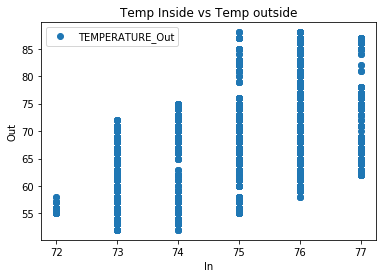

In [7]:
dataset.plot(x='TEMPERATURE_In', y='TEMPERATURE_Out', style='o')  
plt.title('Temp Inside vs Temp outside')  
plt.xlabel('In')  
plt.ylabel('Out')  
plt.show()

C:\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


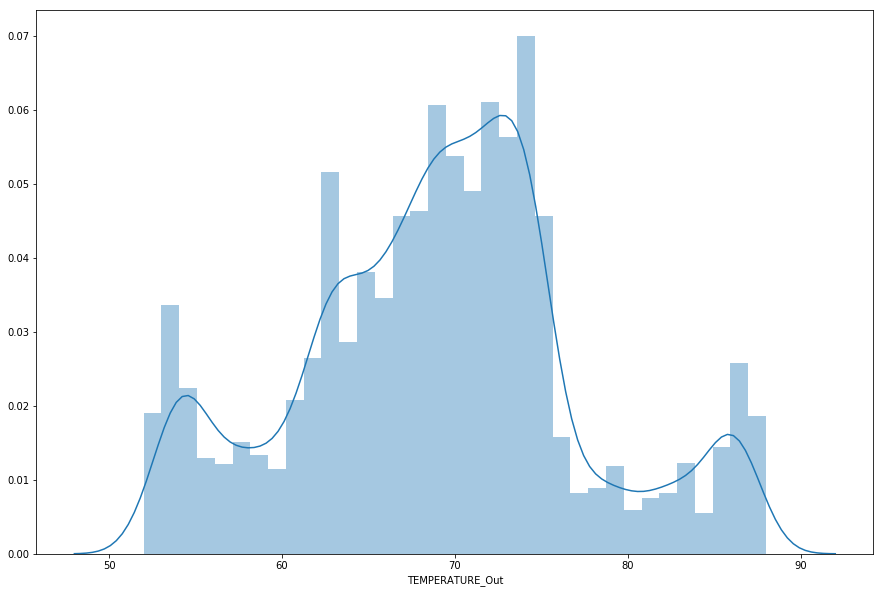

In [8]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['TEMPERATURE_Out'])

In [9]:
#clean data part 2
cleaned_data = dataset.dropna()
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6973 entries, 0 to 6986
Data columns (total 14 columns):
Unnamed: 0         6973 non-null int64
id_Out             6973 non-null int64
TIME_STAMP         6973 non-null float64
TEMPERATURE_Out    6973 non-null int64
GAS_Out            6973 non-null int64
HUMIDITY_Out       6973 non-null float64
PRESSURE_Out       6973 non-null float64
ALTITUDE_Out       6973 non-null float64
id_In              6973 non-null float64
TEMPERATURE_In     6973 non-null float64
GAS_In             6973 non-null float64
HUMIDITY_In        6973 non-null float64
PRESSURE_In        6973 non-null float64
ALTITUDE_In        6973 non-null float64
dtypes: float64(10), int64(4)
memory usage: 817.1 KB


In [10]:
#defining x and y
X = cleaned_data['TEMPERATURE_Out'].values.reshape(-1,1)
y = cleaned_data['TEMPERATURE_In'].values.reshape(-1,1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
#training the algorithm
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[71.39342552]
[[0.0543765]]


In [14]:
y_pred = regressor.predict(X_test)

In [15]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,76.0,74.710392
1,77.0,74.873522
2,76.0,74.764769
3,77.0,74.819145
4,76.0,75.145404
5,73.0,74.819145
6,77.0,75.417287
7,74.0,75.091028
8,74.0,74.492886
9,76.0,75.580416


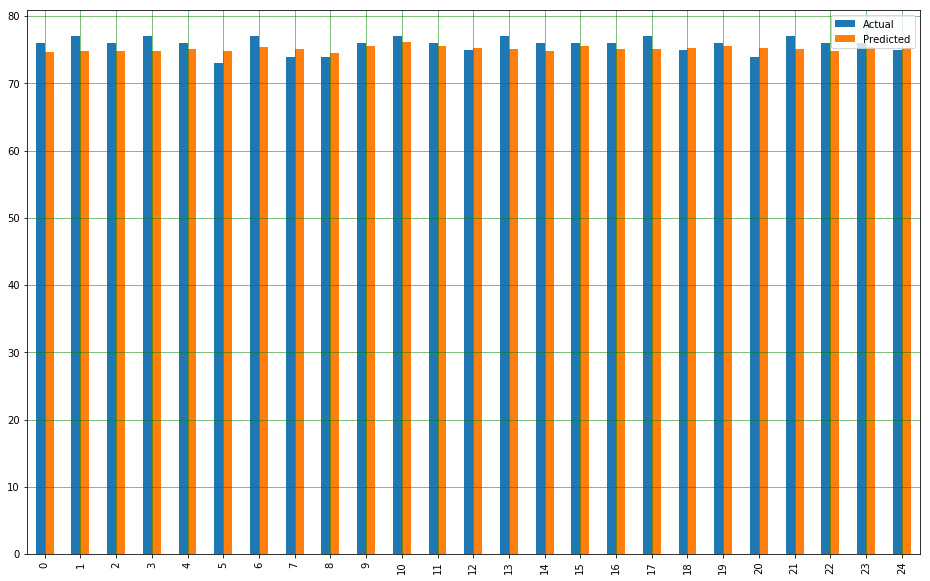

In [16]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

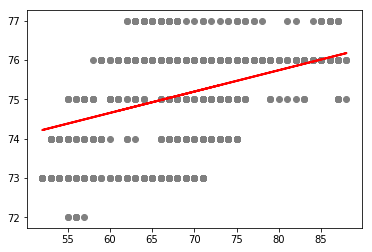

In [17]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9746769509645166
Mean Squared Error: 1.3357991915344378
Root Mean Squared Error: 1.1557677930858075


In [19]:
#multiple linear regression
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [20]:
dataset = pd.read_csv('Merged_Data.csv')

In [21]:
dataset.shape

(6988, 14)

In [22]:
dataset.describe()

,Unnamed: 0,id_Out,TIME_STAMP,TEMPERATURE_Out,GAS_Out,HUMIDITY_Out,PRESSURE_Out,ALTITUDE_Out,id_In,TEMPERATURE_In,GAS_In,HUMIDITY_In,PRESSURE_In,ALTITUDE_In
count,6988.000000,6988.000000,6.988000e+03,6988.000000,6.988000e+03,6988.000000,6988.000000,6988.000000,6973.000000,6973.000000,6.973000e+03,6973.000000,6973.000000,6973.000000
mean,3493.500000,3495.500000,1.557898e+18,69.040641,7.743170e+05,70.708844,982.406096,260.050100,3495.480855,75.142120,9.372034e+05,44.844027,980.432425,276.903012
std,2017.406173,2017.406173,1.212998e+14,8.101320,3.087057e+05,14.824659,2.647033,22.627763,2017.333623,1.215467,7.493885e+05,3.431658,2.651789,22.703710
min,0.000000,2.000000,1.557688e+18,52.000000,1.792250e+05,43.000000,974.900000,226.800000,2.000000,72.000000,7.239330e+05,35.000000,972.800000,244.300000
25%,1746.750000,1748.750000,1.557792e+18,64.000000,7.239330e+05,55.600000,981.200000,243.600000,1749.000000,74.000000,7.239330e+05,42.700000,979.500000,261.300000
50%,3493.500000,3495.500000,1.557898e+18,69.000000,7.239330e+05,73.000000,983.100000,254.400000,3495.000000,76.000000,7.239330e+05,45.000000,981.300000,269.700000
75%,5240.250000,5242.250000,1.558003e+18,74.000000,7.637508e+05,85.300000,984.300000,270.200000,5242.000000,76.000000,7.239330e+05,46.200000,982.300000,285.100000
max,6987.000000,6989.000000,1.558108e+18,88.000000,3.076923e+06,93.800000,986.300000,323.900000,6989.000000,77.000000,6.049661e+06,63.100000,984.300000,342.400000


In [23]:
dataset.isnull().any()

Unnamed: 0         False
id_Out             False
TIME_STAMP         False
TEMPERATURE_Out    False
GAS_Out            False
HUMIDITY_Out       False
PRESSURE_Out       False
ALTITUDE_Out       False
id_In               True
TEMPERATURE_In      True
GAS_In              True
HUMIDITY_In         True
PRESSURE_In         True
ALTITUDE_In         True
dtype: bool

In [24]:
dataset = dataset.fillna(method='ffill')

In [25]:
X = dataset[['TEMPERATURE_Out', 'GAS_Out', 'PRESSURE_Out']].values
y = dataset['TEMPERATURE_In'].values

C:\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


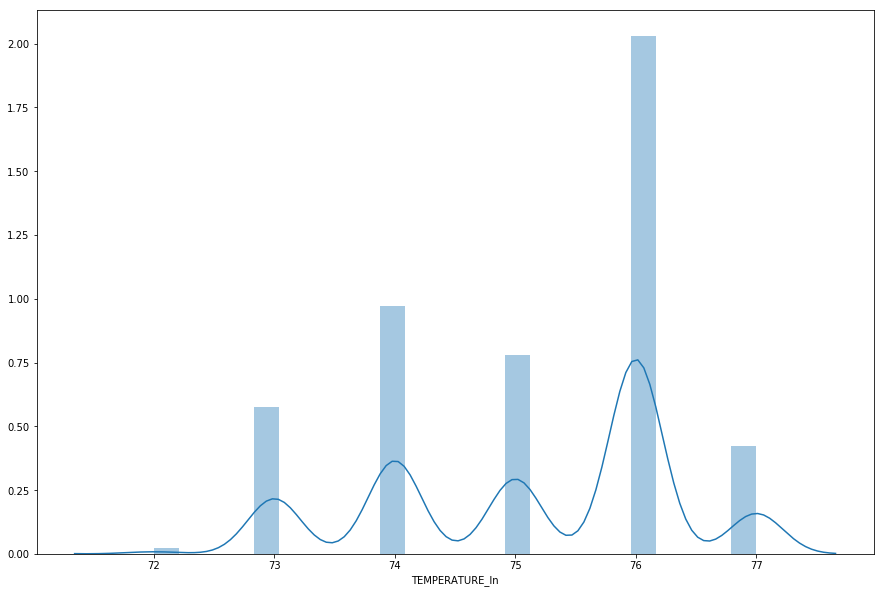

In [26]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['TEMPERATURE_In'])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)